# Importación de librerías

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA

# Importación del conjunto de datos

In [32]:
data = pd.read_csv("./datos.csv",  sep = ';',index_col=0)

data.head(5)

,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
frame,,,,,,,,,,,,,,,,,,,,,
1,sentarse,0.496513,0.391797,-0.228675,0.497693,0.387753,-0.222847,0.498450,0.388126,-0.222853,...,0.012102,0.486108,0.583033,-0.033983,0.511950,0.588696,-0.015748,0.490280,0.591626,-0.065950
2,sentarse,0.496397,0.391697,-0.200978,0.497610,0.387340,-0.193793,0.498411,0.387566,-0.193820,...,-0.005365,0.486081,0.583744,-0.052926,0.511741,0.589572,-0.041306,0.489741,0.592514,-0.092338
3,sentarse,0.496019,0.390957,-0.172315,0.497260,0.386117,-0.166023,0.498138,0.386188,-0.166053,...,-0.024103,0.486075,0.584625,-0.048225,0.510231,0.589807,-0.066917,0.487988,0.594700,-0.090789
4,sentarse,0.495835,0.389214,-0.132569,0.497103,0.384293,-0.126539,0.498056,0.384327,-0.126565,...,-0.032235,0.486169,0.584586,-0.052476,0.510114,0.589376,-0.074378,0.488209,0.594773,-0.095094
5,sentarse,0.495808,0.388118,-0.100940,0.497033,0.383358,-0.095321,0.498029,0.383323,-0.095341,...,-0.065377,0.487016,0.584660,-0.074366,0.506574,0.589372,-0.108042,0.488177,0.594889,-0.116433


# EDA

## Cálculo de la varianza acumulada por componentes

Varianza explicada por cada componente principal:
Componente 1: 0.3904
Componente 2: 0.1972
Componente 3: 0.1719
Componente 4: 0.0919
Componente 5: 0.0541
Componente 6: 0.0304
Componente 7: 0.0244
Componente 8: 0.0117
Componente 9: 0.0080
Componente 10: 0.0050
Componente 11: 0.0032
Componente 12: 0.0027
Componente 13: 0.0024
Componente 14: 0.0019
Componente 15: 0.0011


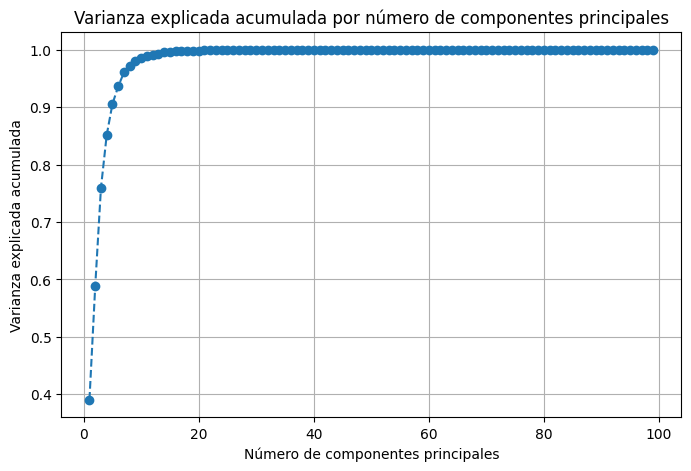

In [33]:
#Calcular la varianza explicada acumulada
data_2=data.drop('label', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA()  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

## Reducción de dimensionalidad y gráfica

<ipython-input-34-850e628774b6>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


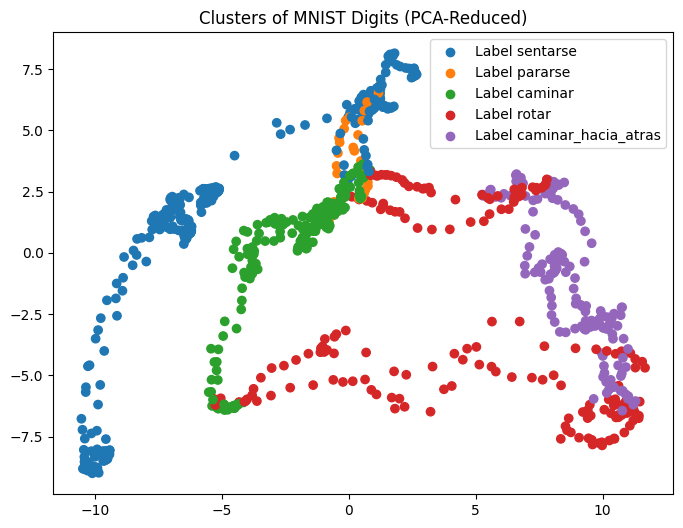

In [34]:
labels = data['label']

data_2=data.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=8)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()



## Prueba con Kmeans sin etiquetas

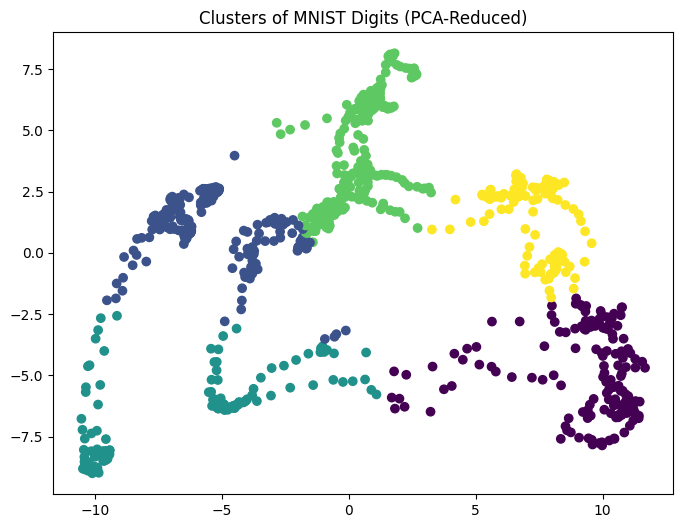

In [35]:
labels = data['label']

data_2=data.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0,n_init=2)  # 10 clusters for 10 digits
cluster_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced)")
plt.show()

## Agrupación de los fotogramas

In [36]:
result_data = []

# Agrupar por el label
df = data.copy()

grouped = df.groupby('label')

for label, group in grouped:
    # Tomar grupos de 5 frames
    for i in range(0, len(group), 5):
        # Tomar un grupo de 5 frames
        frame_group = group.iloc[i:i + 5]

        # Verificar si hay menos de 5 frames
        if len(frame_group) < 5:
            continue  # Saltar si no hay suficientes frames para completar el grupo

        # Crear un diccionario para almacenar los datos de este grupo
        aggregated_data = {'label': label}

        # Agregar los landmarks de los frames
        for j in range(33):  # Hay 33 landmarks en MediaPipe Pose
            # Obtener las coordenadas x, y, z de cada landmark para cada uno de los 5 frames
            for k in range(5):  # k de 0 a 4 para los 5 frames
                aggregated_data[f'landmark_{j}_x_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_x']
                aggregated_data[f'landmark_{j}_y_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_y']
                aggregated_data[f'landmark_{j}_z_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_z']

        # Agregar el resultado a la lista
        result_data.append(aggregated_data)

# Convertir la lista de resultados a un DataFrame
result_df = pd.DataFrame(result_data)

result_df

,label,landmark_0_x_frame_1,landmark_0_y_frame_1,landmark_0_z_frame_1,landmark_0_x_frame_2,landmark_0_y_frame_2,landmark_0_z_frame_2,landmark_0_x_frame_3,landmark_0_y_frame_3,landmark_0_z_frame_3,...,landmark_32_z_frame_2,landmark_32_x_frame_3,landmark_32_y_frame_3,landmark_32_z_frame_3,landmark_32_x_frame_4,landmark_32_y_frame_4,landmark_32_z_frame_4,landmark_32_x_frame_5,landmark_32_y_frame_5,landmark_32_z_frame_5
0,caminar,0.507585,0.343761,-0.119086,0.508140,0.343917,-0.120467,0.508441,0.344050,-0.125081,...,-0.008583,0.491667,0.595692,-0.000292,0.493366,0.597369,-0.015789,0.494391,0.600238,-0.036042
1,caminar,0.509225,0.345657,-0.129479,0.509051,0.346514,-0.129076,0.508905,0.347009,-0.127004,...,-0.073814,0.494123,0.603883,-0.080173,0.492878,0.603275,-0.084542,0.492850,0.602883,-0.077312
2,caminar,0.507978,0.350622,-0.123904,0.507247,0.351259,-0.122229,0.506611,0.350932,-0.118715,...,-0.111031,0.497811,0.618488,-0.066107,0.498876,0.619648,-0.090912,0.499621,0.619784,-0.126313
3,caminar,0.503905,0.347867,-0.123210,0.503182,0.346293,-0.125327,0.502780,0.344978,-0.130463,...,-0.069912,0.499870,0.622394,-0.039648,0.499755,0.623941,-0.020851,0.499463,0.625507,0.007646
4,caminar,0.502559,0.343265,-0.139913,0.502407,0.343139,-0.144382,0.502336,0.343010,-0.143864,...,0.018288,0.498963,0.626896,0.022217,0.498183,0.627048,0.024335,0.499378,0.631790,0.042271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,sentarse,0.498946,0.266846,-0.163150,0.498903,0.265690,-0.162708,0.498856,0.264657,-0.162243,...,-0.248515,0.445229,0.699865,-0.248910,0.445113,0.699078,-0.248035,0.445016,0.698353,-0.250874
194,sentarse,0.498427,0.261893,-0.160510,0.498225,0.261046,-0.163238,0.498195,0.259669,-0.163396,...,-0.248351,0.445021,0.695780,-0.243667,0.445047,0.694829,-0.242744,0.445062,0.694067,-0.239029
195,sentarse,0.497672,0.256416,-0.164816,0.497462,0.255801,-0.164819,0.497314,0.255300,-0.162813,...,-0.232087,0.444950,0.691680,-0.232179,0.444909,0.691599,-0.226842,0.444874,0.691617,-0.223189
196,sentarse,0.497144,0.254274,-0.161636,0.497128,0.254150,-0.161593,0.497073,0.254033,-0.160857,...,-0.225166,0.444679,0.691384,-0.226976,0.444677,0.691272,-0.237593,0.444663,0.691197,-0.239459


In [37]:
data.shape

(1007, 100)

## Agrupación de los fotogramas (con redundancia)

In [38]:
result_data = []

# Agrupar por el label
grouped = df.groupby('label')

for label, group in grouped:
    # Tomar grupos de 5 frames con solapamientos
    for i in range(len(group) - 4):  # -4 para asegurarnos de que haya al menos 5 frames
        # Tomar un grupo de 5 frames
        frame_group = group.iloc[i:i + 5]

        # Crear un diccionario para almacenar los datos de este grupo
        aggregated_data = {'label': label}

        # Agregar los landmarks de los frames
        for j in range(33):  # Hay 33 landmarks en MediaPipe Pose
            # Obtener las coordenadas x, y, z de cada landmark para cada uno de los 5 frames
            for k in range(5):  # k de 0 a 4 para los 5 frames
                aggregated_data[f'landmark_{j}_x_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_x']
                aggregated_data[f'landmark_{j}_y_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_y']
                aggregated_data[f'landmark_{j}_z_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_z']

        # Agregar el resultado a la lista
        result_data.append(aggregated_data)

# Convertir la lista de resultados a un DataFrame
result_df_2 = pd.DataFrame(result_data)

result_df_2.shape

(987, 496)

In [39]:
result_df_2

,label,landmark_0_x_frame_1,landmark_0_y_frame_1,landmark_0_z_frame_1,landmark_0_x_frame_2,landmark_0_y_frame_2,landmark_0_z_frame_2,landmark_0_x_frame_3,landmark_0_y_frame_3,landmark_0_z_frame_3,...,landmark_32_z_frame_2,landmark_32_x_frame_3,landmark_32_y_frame_3,landmark_32_z_frame_3,landmark_32_x_frame_4,landmark_32_y_frame_4,landmark_32_z_frame_4,landmark_32_x_frame_5,landmark_32_y_frame_5,landmark_32_z_frame_5
0,caminar,0.507585,0.343761,-0.119086,0.508140,0.343917,-0.120467,0.508441,0.344050,-0.125081,...,-0.008583,0.491667,0.595692,-0.000292,0.493366,0.597369,-0.015789,0.494391,0.600238,-0.036042
1,caminar,0.508140,0.343917,-0.120467,0.508441,0.344050,-0.125081,0.508803,0.344539,-0.128927,...,-0.000292,0.493366,0.597369,-0.015789,0.494391,0.600238,-0.036042,0.494615,0.600587,-0.046325
2,caminar,0.508441,0.344050,-0.125081,0.508803,0.344539,-0.128927,0.509103,0.345210,-0.128461,...,-0.015789,0.494391,0.600238,-0.036042,0.494615,0.600587,-0.046325,0.494446,0.603395,-0.073814
3,caminar,0.508803,0.344539,-0.128927,0.509103,0.345210,-0.128461,0.509225,0.345657,-0.129479,...,-0.036042,0.494615,0.600587,-0.046325,0.494446,0.603395,-0.073814,0.494123,0.603883,-0.080173
4,caminar,0.509103,0.345210,-0.128461,0.509225,0.345657,-0.129479,0.509051,0.346514,-0.129076,...,-0.046325,0.494446,0.603395,-0.073814,0.494123,0.603883,-0.080173,0.492878,0.603275,-0.084542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,sentarse,0.496896,0.253952,-0.160051,0.496898,0.253840,-0.160981,0.496942,0.253721,-0.161049,...,-0.239698,0.444661,0.690970,-0.239371,0.444660,0.690823,-0.238049,0.444674,0.690625,-0.235920
983,sentarse,0.496898,0.253840,-0.160981,0.496942,0.253721,-0.161049,0.496997,0.253541,-0.163784,...,-0.239371,0.444660,0.690823,-0.238049,0.444674,0.690625,-0.235920,0.444725,0.690363,-0.236611
984,sentarse,0.496942,0.253721,-0.161049,0.496997,0.253541,-0.163784,0.497101,0.253382,-0.165760,...,-0.238049,0.444674,0.690625,-0.235920,0.444725,0.690363,-0.236611,0.444736,0.690354,-0.236749
985,sentarse,0.496997,0.253541,-0.163784,0.497101,0.253382,-0.165760,0.497166,0.253235,-0.165031,...,-0.235920,0.444725,0.690363,-0.236611,0.444736,0.690354,-0.236749,0.445271,0.690343,-0.222776


## Varianza por componentes y gráfica de las agrupaciones

Varianza explicada por cada componente principal:
Componente 1: 0.3891
Componente 2: 0.1930
Componente 3: 0.1700
Componente 4: 0.0890
Componente 5: 0.0522
Componente 6: 0.0293
Componente 7: 0.0225
Componente 8: 0.0110
Componente 9: 0.0072
Componente 10: 0.0051
Componente 11: 0.0046
Componente 12: 0.0031
Componente 13: 0.0027
Componente 14: 0.0025
Componente 15: 0.0022
Componente 16: 0.0021
Componente 17: 0.0017
Componente 18: 0.0016
Componente 19: 0.0012
Componente 20: 0.0011


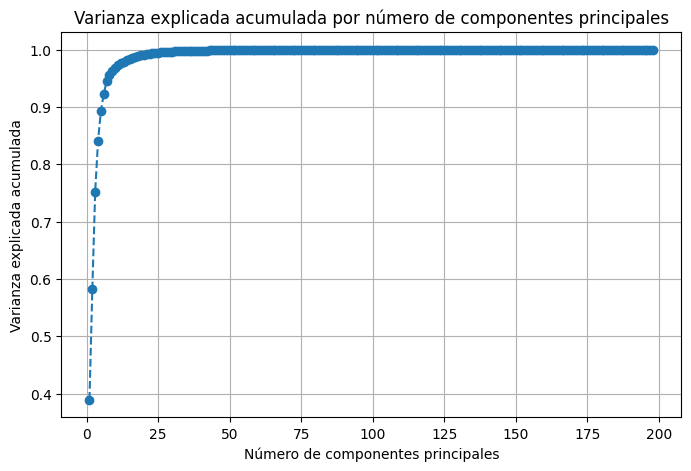

In [40]:
#Calcular la varianza explicada acumulada
data_2=result_df.drop('label', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA()  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

<ipython-input-41-7db62c3da424>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


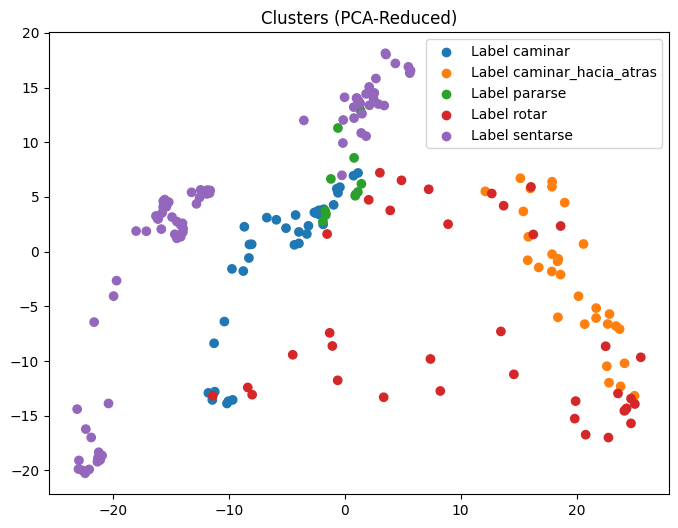

In [41]:
labels = result_df['label']

data_2=result_df.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=20)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()


## Varianza por componentes y gráfica de las agrupaciones con redundancia

Varianza explicada por cada componente principal:
Componente 1: 0.3898
Componente 2: 0.1911
Componente 3: 0.1703
Componente 4: 0.0890
Componente 5: 0.0519
Componente 6: 0.0294
Componente 7: 0.0220
Componente 8: 0.0109
Componente 9: 0.0073
Componente 10: 0.0053
Componente 11: 0.0049
Componente 12: 0.0030
Componente 13: 0.0025
Componente 14: 0.0023
Componente 15: 0.0021
Componente 16: 0.0017
Componente 17: 0.0017
Componente 18: 0.0015
Componente 19: 0.0012
Componente 20: 0.0010


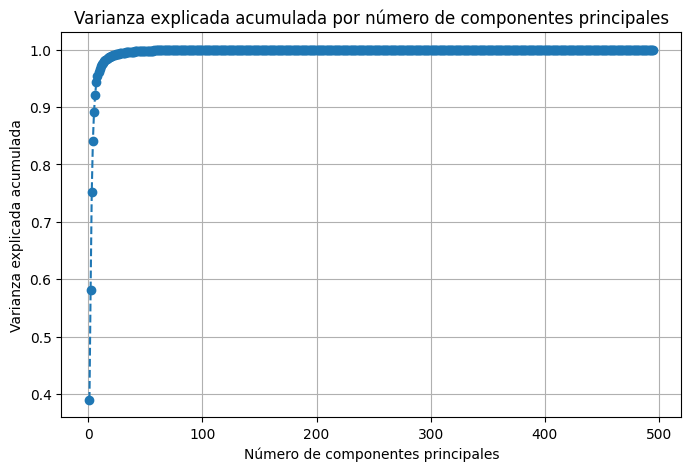

In [42]:
#Calcular la varianza explicada acumulada
data_2=result_df_2.drop('label', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA()  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

<ipython-input-43-858d3912a673>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


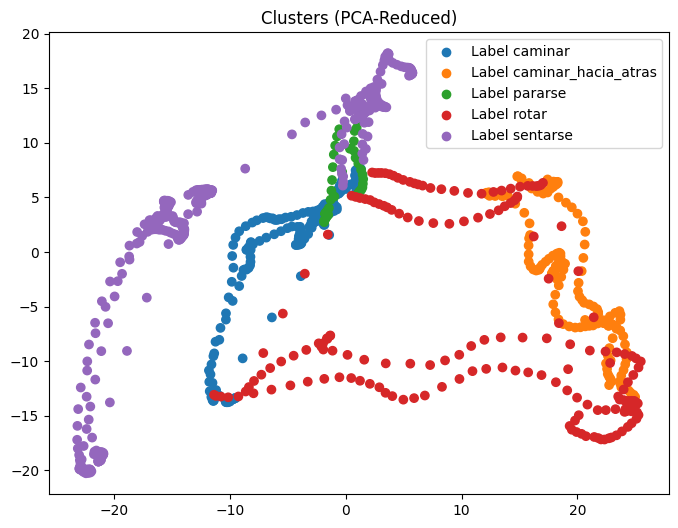

In [43]:
labels = result_df_2['label']

data_2=result_df_2.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=20)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()